<a href="https://colab.research.google.com/github/ani0722/Demystifying-Breast-cancer-prediction-Model-using-LIME/blob/main/LIME.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=a7cc83fcc0c894019ceddc3295236d90ee8b6942158d429be23587e0965344b4
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


**1. Using Decision Tree (Transparent Method)**

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from lime import lime_tabular

In [ ]:
data = load_breast_cancer()
X,y = data['data'], data['target']

In [ ]:
print(data['feature_names'])

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [ ]:
print(data['target_names']) #0 -> malignant and 1-> benign

['malignant' 'benign']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)

print(tree_clf.score(X_test,y_test))

0.9035087719298246


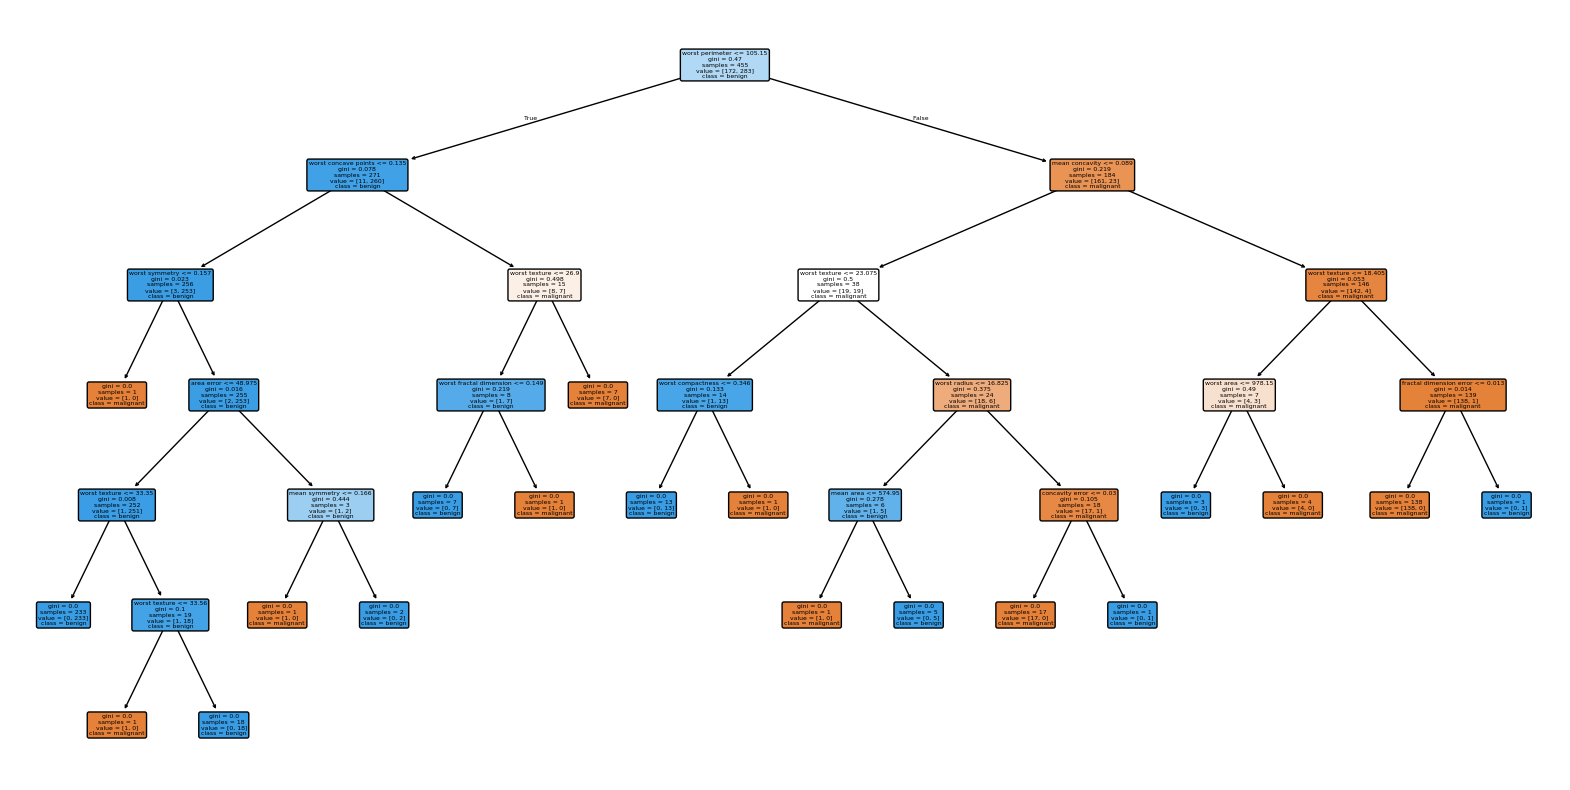

In [ ]:
plt.figure(figsize=(20,10))
plot_tree(tree_clf,filled=True,feature_names=data['feature_names'],class_names=data['target_names'], rounded=True)
plt.show()

**2. Using Random Forest Classifier (Post-Hoc Method)**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
forest_clf = RandomForestClassifier()
forest_clf.fit(X_train, y_train)
print(forest_clf.score(X_test,y_test))

0.9649122807017544


In [ ]:
print(dict(zip(data['feature_names'],forest_clf.feature_importances_)))

{'mean radius': 0.037047289005044025, 'mean texture': 0.01567385699214558, 'mean perimeter': 0.032456191298583896, 'mean area': 0.038004135243425004, 'mean smoothness': 0.00503902215163203, 'mean compactness': 0.007433773916024549, 'mean concavity': 0.0706324013745034, 'mean concave points': 0.0977289765827983, 'mean symmetry': 0.0050845212900677466, 'mean fractal dimension': 0.0030378913415229037, 'radius error': 0.015016253255915168, 'texture error': 0.0022785125030985454, 'perimeter error': 0.0064723568876486086, 'area error': 0.06290537874436083, 'smoothness error': 0.004157120882626036, 'compactness error': 0.005106531640759213, 'concavity error': 0.004546083130936215, 'concave points error': 0.0044227440236938205, 'symmetry error': 0.005082156680344396, 'fractal dimension error': 0.003909525494449485, 'worst radius': 0.09382802233091667, 'worst texture': 0.018694478764219022, 'worst perimeter': 0.17806831306593537, 'worst area': 0.13010386654658523, 'worst smoothness': 0.01115936

**Using LIME to Explain Random Forest's Decisions**

Correct:  benign
Model Classification:  benign
{'mean radius': 10.48, 'mean texture': 19.86, 'mean perimeter': 66.72, 'mean area': 337.7, 'mean smoothness': 0.107, 'mean compactness': 0.05971, 'mean concavity': 0.04831, 'mean concave points': 0.0307, 'mean symmetry': 0.1737, 'mean fractal dimension': 0.0644, 'radius error': 0.3719, 'texture error': 2.612, 'perimeter error': 2.517, 'area error': 23.22, 'smoothness error': 0.01604, 'compactness error': 0.01386, 'concavity error': 0.01865, 'concave points error': 0.01133, 'symmetry error': 0.03476, 'fractal dimension error': 0.00356, 'worst radius': 11.48, 'worst texture': 29.46, 'worst perimeter': 73.68, 'worst area': 402.8, 'worst smoothness': 0.1515, 'worst compactness': 0.1026, 'worst concavity': 0.1181, 'worst concave points': 0.06736, 'worst symmetry': 0.2883, 'worst fractal dimension': 0.07748}


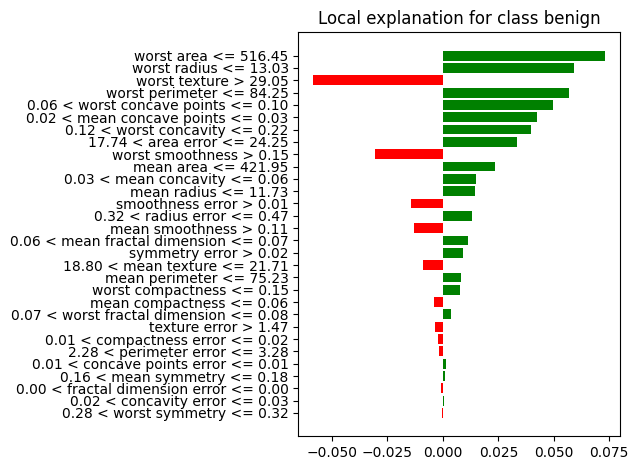

Correct:  malignant
Model Classification:  malignant
{'mean radius': 18.49, 'mean texture': 17.52, 'mean perimeter': 121.3, 'mean area': 1068.0, 'mean smoothness': 0.1012, 'mean compactness': 0.1317, 'mean concavity': 0.1491, 'mean concave points': 0.09183, 'mean symmetry': 0.1832, 'mean fractal dimension': 0.06697, 'radius error': 0.7923, 'texture error': 1.045, 'perimeter error': 4.851, 'area error': 95.77, 'smoothness error': 0.007974, 'compactness error': 0.03214, 'concavity error': 0.04435, 'concave points error': 0.01573, 'symmetry error': 0.01617, 'fractal dimension error': 0.005255, 'worst radius': 22.75, 'worst texture': 22.88, 'worst perimeter': 146.4, 'worst area': 1600.0, 'worst smoothness': 0.1412, 'worst compactness': 0.3089, 'worst concavity': 0.3533, 'worst concave points': 0.1663, 'worst symmetry': 0.251, 'worst fractal dimension': 0.09445}


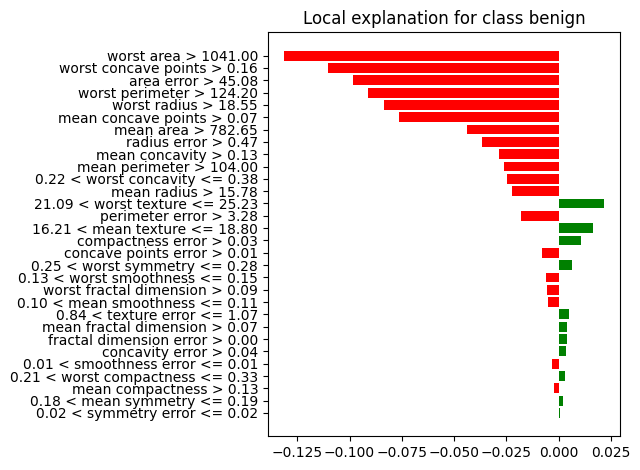

Correct:  malignant
Model Classification:  malignant
{'mean radius': 21.09, 'mean texture': 26.57, 'mean perimeter': 142.7, 'mean area': 1311.0, 'mean smoothness': 0.1141, 'mean compactness': 0.2832, 'mean concavity': 0.2487, 'mean concave points': 0.1496, 'mean symmetry': 0.2395, 'mean fractal dimension': 0.07398, 'radius error': 0.6298, 'texture error': 0.7629, 'perimeter error': 4.414, 'area error': 81.46, 'smoothness error': 0.004253, 'compactness error': 0.04759, 'concavity error': 0.03872, 'concave points error': 0.01567, 'symmetry error': 0.01798, 'fractal dimension error': 0.005295, 'worst radius': 26.68, 'worst texture': 33.48, 'worst perimeter': 176.5, 'worst area': 2089.0, 'worst smoothness': 0.1491, 'worst compactness': 0.7584, 'worst concavity': 0.678, 'worst concave points': 0.2903, 'worst symmetry': 0.4098, 'worst fractal dimension': 0.1284}


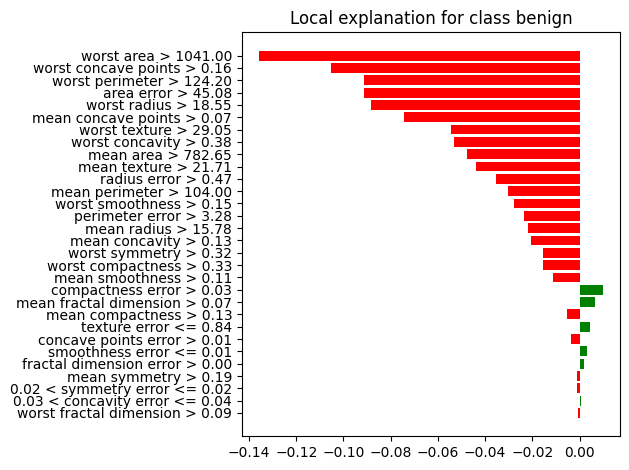

Correct:  malignant
Model Classification:  malignant
{'mean radius': 19.8, 'mean texture': 21.56, 'mean perimeter': 129.7, 'mean area': 1230.0, 'mean smoothness': 0.09383, 'mean compactness': 0.1306, 'mean concavity': 0.1272, 'mean concave points': 0.08691, 'mean symmetry': 0.2094, 'mean fractal dimension': 0.05581, 'radius error': 0.9553, 'texture error': 1.186, 'perimeter error': 6.487, 'area error': 124.4, 'smoothness error': 0.006804, 'compactness error': 0.03169, 'concavity error': 0.03446, 'concave points error': 0.01712, 'symmetry error': 0.01897, 'fractal dimension error': 0.004045, 'worst radius': 25.73, 'worst texture': 28.64, 'worst perimeter': 170.3, 'worst area': 2009.0, 'worst smoothness': 0.1353, 'worst compactness': 0.3235, 'worst concavity': 0.3617, 'worst concave points': 0.182, 'worst symmetry': 0.307, 'worst fractal dimension': 0.08255}


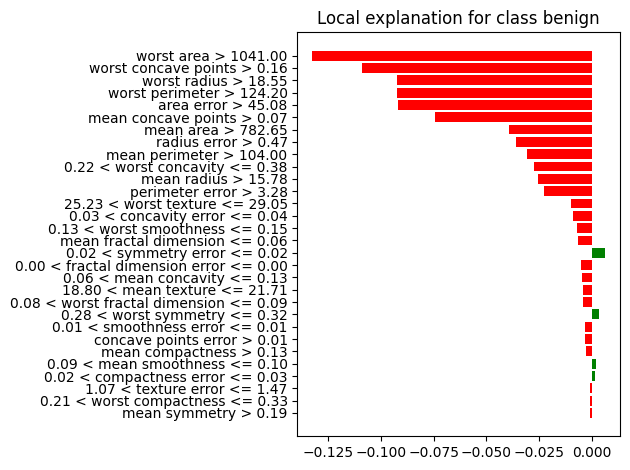

Correct:  benign
Model Classification:  benign
{'mean radius': 11.47, 'mean texture': 16.03, 'mean perimeter': 73.02, 'mean area': 402.7, 'mean smoothness': 0.09076, 'mean compactness': 0.05886, 'mean concavity': 0.02587, 'mean concave points': 0.02322, 'mean symmetry': 0.1634, 'mean fractal dimension': 0.06372, 'radius error': 0.1707, 'texture error': 0.7615, 'perimeter error': 1.09, 'area error': 12.25, 'smoothness error': 0.009191, 'compactness error': 0.008548, 'concavity error': 0.0094, 'concave points error': 0.006315, 'symmetry error': 0.01755, 'fractal dimension error': 0.003009, 'worst radius': 12.51, 'worst texture': 20.79, 'worst perimeter': 79.67, 'worst area': 475.8, 'worst smoothness': 0.1531, 'worst compactness': 0.112, 'worst concavity': 0.09823, 'worst concave points': 0.06548, 'worst symmetry': 0.2851, 'worst fractal dimension': 0.08763}


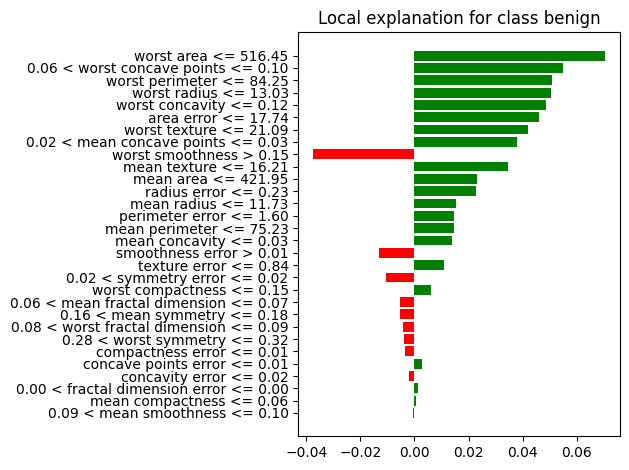

Correct:  malignant
Model Classification:  malignant
{'mean radius': 17.08, 'mean texture': 27.15, 'mean perimeter': 111.2, 'mean area': 930.9, 'mean smoothness': 0.09898, 'mean compactness': 0.111, 'mean concavity': 0.1007, 'mean concave points': 0.06431, 'mean symmetry': 0.1793, 'mean fractal dimension': 0.06281, 'radius error': 0.9291, 'texture error': 1.152, 'perimeter error': 6.051, 'area error': 115.2, 'smoothness error': 0.00874, 'compactness error': 0.02219, 'concavity error': 0.02721, 'concave points error': 0.01458, 'symmetry error': 0.02045, 'fractal dimension error': 0.004417, 'worst radius': 22.96, 'worst texture': 34.49, 'worst perimeter': 152.1, 'worst area': 1648.0, 'worst smoothness': 0.16, 'worst compactness': 0.2444, 'worst concavity': 0.2639, 'worst concave points': 0.1555, 'worst symmetry': 0.301, 'worst fractal dimension': 0.0906}


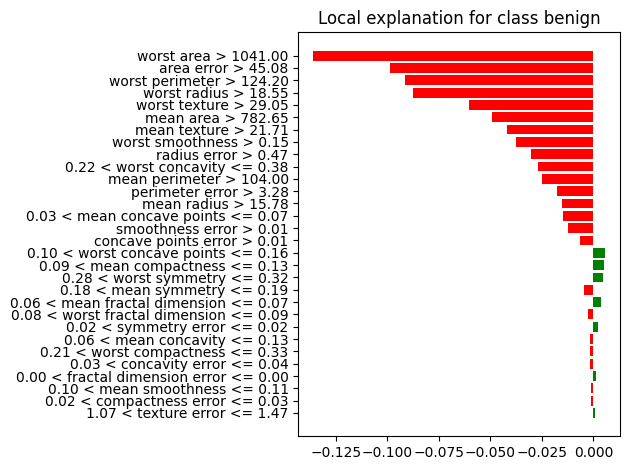

Correct:  malignant
Model Classification:  malignant
{'mean radius': 19.07, 'mean texture': 24.81, 'mean perimeter': 128.3, 'mean area': 1104.0, 'mean smoothness': 0.09081, 'mean compactness': 0.219, 'mean concavity': 0.2107, 'mean concave points': 0.09961, 'mean symmetry': 0.231, 'mean fractal dimension': 0.06343, 'radius error': 0.9811, 'texture error': 1.666, 'perimeter error': 8.83, 'area error': 104.9, 'smoothness error': 0.006548, 'compactness error': 0.1006, 'concavity error': 0.09723, 'concave points error': 0.02638, 'symmetry error': 0.05333, 'fractal dimension error': 0.007646, 'worst radius': 24.09, 'worst texture': 33.17, 'worst perimeter': 177.4, 'worst area': 1651.0, 'worst smoothness': 0.1247, 'worst compactness': 0.7444, 'worst concavity': 0.7242, 'worst concave points': 0.2493, 'worst symmetry': 0.467, 'worst fractal dimension': 0.1038}


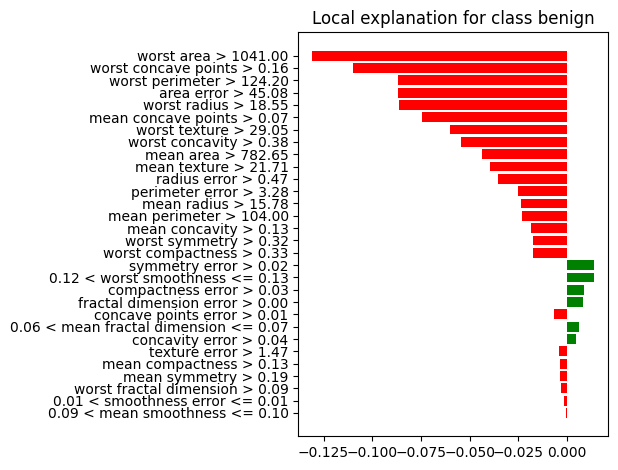

Correct:  benign
Model Classification:  benign
{'mean radius': 9.847, 'mean texture': 15.68, 'mean perimeter': 63.0, 'mean area': 293.2, 'mean smoothness': 0.09492, 'mean compactness': 0.08419, 'mean concavity': 0.0233, 'mean concave points': 0.02416, 'mean symmetry': 0.1387, 'mean fractal dimension': 0.06891, 'radius error': 0.2498, 'texture error': 1.216, 'perimeter error': 1.976, 'area error': 15.24, 'smoothness error': 0.008732, 'compactness error': 0.02042, 'concavity error': 0.01062, 'concave points error': 0.006801, 'symmetry error': 0.01824, 'fractal dimension error': 0.003494, 'worst radius': 11.24, 'worst texture': 22.99, 'worst perimeter': 74.32, 'worst area': 376.5, 'worst smoothness': 0.1419, 'worst compactness': 0.2243, 'worst concavity': 0.08434, 'worst concave points': 0.06528, 'worst symmetry': 0.2502, 'worst fractal dimension': 0.09209}


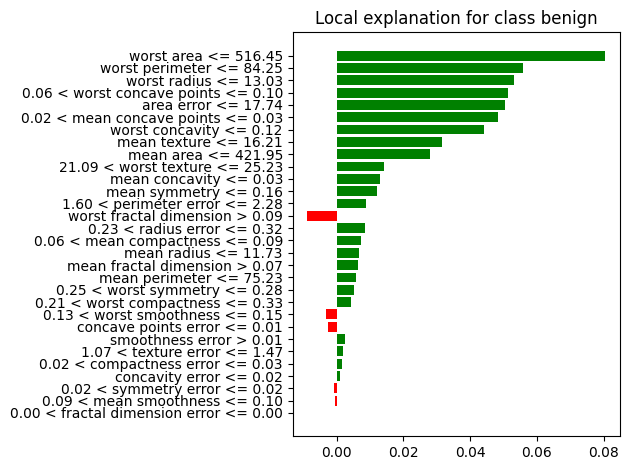

Correct:  benign
Model Classification:  benign
{'mean radius': 9.504, 'mean texture': 12.44, 'mean perimeter': 60.34, 'mean area': 273.9, 'mean smoothness': 0.1024, 'mean compactness': 0.06492, 'mean concavity': 0.02956, 'mean concave points': 0.02076, 'mean symmetry': 0.1815, 'mean fractal dimension': 0.06905, 'radius error': 0.2773, 'texture error': 0.9768, 'perimeter error': 1.909, 'area error': 15.7, 'smoothness error': 0.009606, 'compactness error': 0.01432, 'concavity error': 0.01985, 'concave points error': 0.01421, 'symmetry error': 0.02027, 'fractal dimension error': 0.002968, 'worst radius': 10.23, 'worst texture': 15.66, 'worst perimeter': 65.13, 'worst area': 314.9, 'worst smoothness': 0.1324, 'worst compactness': 0.1148, 'worst concavity': 0.08867, 'worst concave points': 0.06227, 'worst symmetry': 0.245, 'worst fractal dimension': 0.07773}


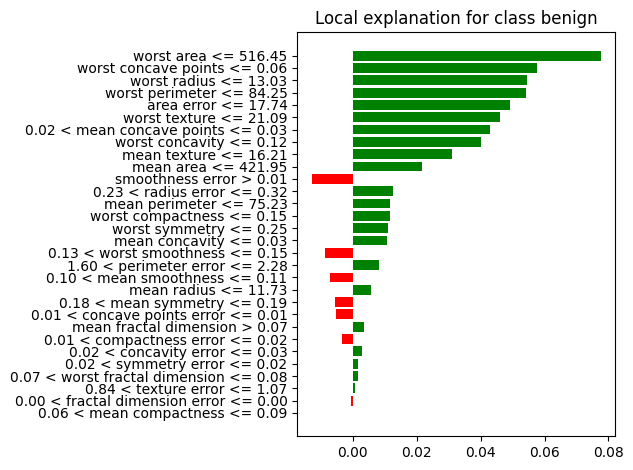

Correct:  benign
Model Classification:  malignant
{'mean radius': 14.64, 'mean texture': 15.24, 'mean perimeter': 95.77, 'mean area': 651.9, 'mean smoothness': 0.1132, 'mean compactness': 0.1339, 'mean concavity': 0.09966, 'mean concave points': 0.07064, 'mean symmetry': 0.2116, 'mean fractal dimension': 0.06346, 'radius error': 0.5115, 'texture error': 0.7372, 'perimeter error': 3.814, 'area error': 42.76, 'smoothness error': 0.005508, 'compactness error': 0.04412, 'concavity error': 0.04436, 'concave points error': 0.01623, 'symmetry error': 0.02427, 'fractal dimension error': 0.004841, 'worst radius': 16.34, 'worst texture': 18.24, 'worst perimeter': 109.4, 'worst area': 803.6, 'worst smoothness': 0.1277, 'worst compactness': 0.3089, 'worst concavity': 0.2604, 'worst concave points': 0.1397, 'worst symmetry': 0.3151, 'worst fractal dimension': 0.08473}


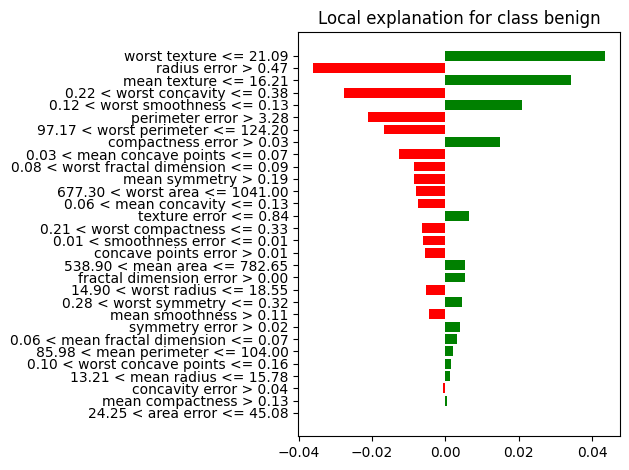

Correct:  benign
Model Classification:  benign
{'mean radius': 8.726, 'mean texture': 15.83, 'mean perimeter': 55.84, 'mean area': 230.9, 'mean smoothness': 0.115, 'mean compactness': 0.08201, 'mean concavity': 0.04132, 'mean concave points': 0.01924, 'mean symmetry': 0.1649, 'mean fractal dimension': 0.07633, 'radius error': 0.1665, 'texture error': 0.5864, 'perimeter error': 1.354, 'area error': 8.966, 'smoothness error': 0.008261, 'compactness error': 0.02213, 'concavity error': 0.03259, 'concave points error': 0.0104, 'symmetry error': 0.01708, 'fractal dimension error': 0.003806, 'worst radius': 9.628, 'worst texture': 19.62, 'worst perimeter': 64.48, 'worst area': 284.4, 'worst smoothness': 0.1724, 'worst compactness': 0.2364, 'worst concavity': 0.2456, 'worst concave points': 0.105, 'worst symmetry': 0.2926, 'worst fractal dimension': 0.1017}


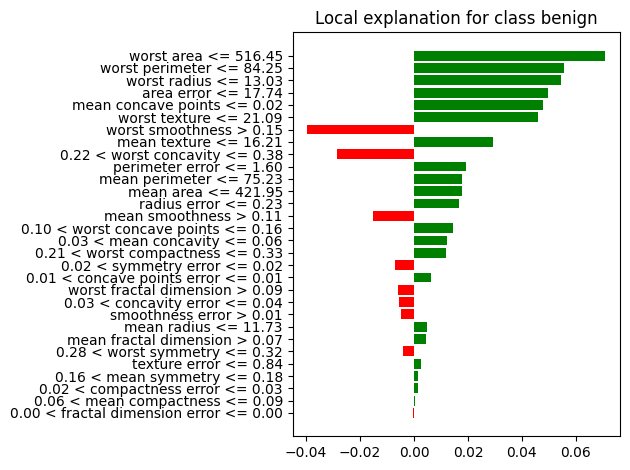

Correct:  benign
Model Classification:  benign
{'mean radius': 11.89, 'mean texture': 17.36, 'mean perimeter': 76.2, 'mean area': 435.6, 'mean smoothness': 0.1225, 'mean compactness': 0.0721, 'mean concavity': 0.05929, 'mean concave points': 0.07404, 'mean symmetry': 0.2015, 'mean fractal dimension': 0.05875, 'radius error': 0.6412, 'texture error': 2.293, 'perimeter error': 4.021, 'area error': 48.84, 'smoothness error': 0.01418, 'compactness error': 0.01489, 'concavity error': 0.01267, 'concave points error': 0.0191, 'symmetry error': 0.02678, 'fractal dimension error': 0.003002, 'worst radius': 12.4, 'worst texture': 18.99, 'worst perimeter': 79.46, 'worst area': 472.4, 'worst smoothness': 0.1359, 'worst compactness': 0.08368, 'worst concavity': 0.07153, 'worst concave points': 0.08946, 'worst symmetry': 0.222, 'worst fractal dimension': 0.06033}


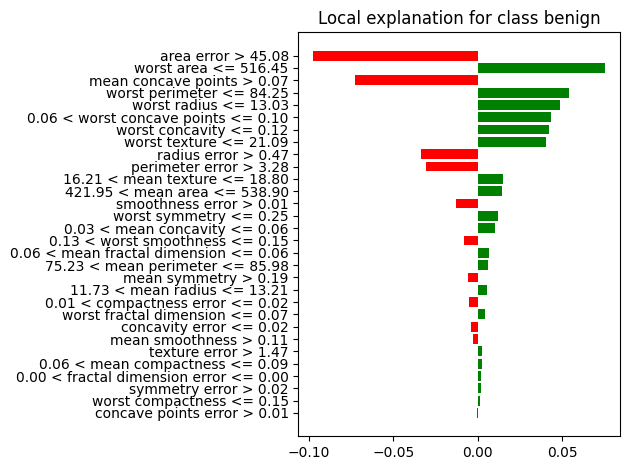

Correct:  benign
Model Classification:  benign
{'mean radius': 11.33, 'mean texture': 14.16, 'mean perimeter': 71.79, 'mean area': 396.6, 'mean smoothness': 0.09379, 'mean compactness': 0.03872, 'mean concavity': 0.001487, 'mean concave points': 0.003333, 'mean symmetry': 0.1954, 'mean fractal dimension': 0.05821, 'radius error': 0.2375, 'texture error': 1.28, 'perimeter error': 1.565, 'area error': 17.09, 'smoothness error': 0.008426, 'compactness error': 0.008998, 'concavity error': 0.001487, 'concave points error': 0.003333, 'symmetry error': 0.02358, 'fractal dimension error': 0.001627, 'worst radius': 12.2, 'worst texture': 18.99, 'worst perimeter': 77.37, 'worst area': 458.0, 'worst smoothness': 0.1259, 'worst compactness': 0.07348, 'worst concavity': 0.004955, 'worst concave points': 0.01111, 'worst symmetry': 0.2758, 'worst fractal dimension': 0.06386}


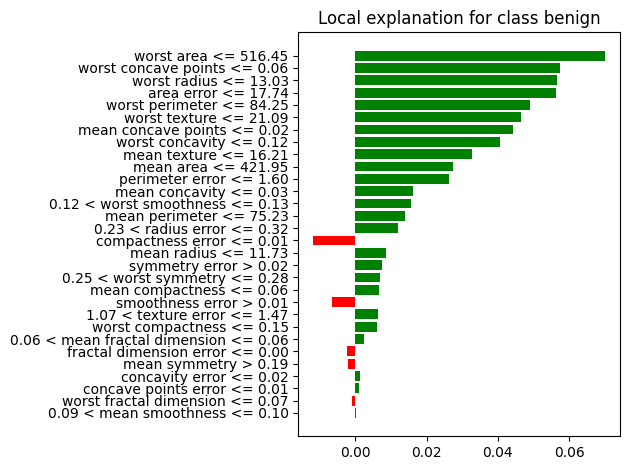

Correct:  malignant
Model Classification:  malignant
{'mean radius': 18.45, 'mean texture': 21.91, 'mean perimeter': 120.2, 'mean area': 1075.0, 'mean smoothness': 0.0943, 'mean compactness': 0.09709, 'mean concavity': 0.1153, 'mean concave points': 0.06847, 'mean symmetry': 0.1692, 'mean fractal dimension': 0.05727, 'radius error': 0.5959, 'texture error': 1.202, 'perimeter error': 3.766, 'area error': 68.35, 'smoothness error': 0.006001, 'compactness error': 0.01422, 'concavity error': 0.02855, 'concave points error': 0.009148, 'symmetry error': 0.01492, 'fractal dimension error': 0.002205, 'worst radius': 22.52, 'worst texture': 31.39, 'worst perimeter': 145.6, 'worst area': 1590.0, 'worst smoothness': 0.1465, 'worst compactness': 0.2275, 'worst concavity': 0.3965, 'worst concave points': 0.1379, 'worst symmetry': 0.3109, 'worst fractal dimension': 0.0761}


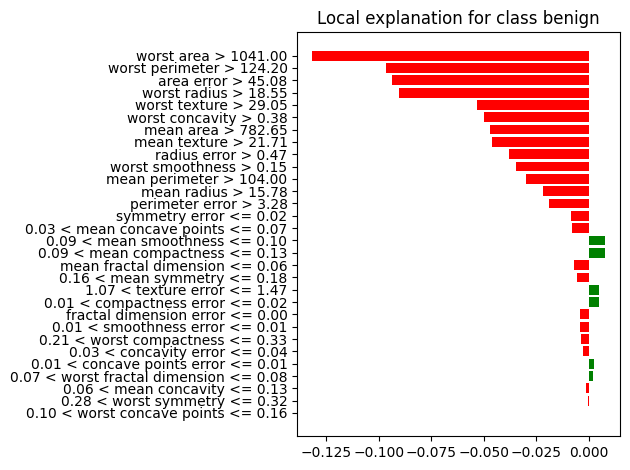

Correct:  benign
Model Classification:  benign
{'mean radius': 11.22, 'mean texture': 33.81, 'mean perimeter': 70.79, 'mean area': 386.8, 'mean smoothness': 0.0778, 'mean compactness': 0.03574, 'mean concavity': 0.004967, 'mean concave points': 0.006434, 'mean symmetry': 0.1845, 'mean fractal dimension': 0.05828, 'radius error': 0.2239, 'texture error': 1.647, 'perimeter error': 1.489, 'area error': 15.46, 'smoothness error': 0.004359, 'compactness error': 0.006813, 'concavity error': 0.003223, 'concave points error': 0.003419, 'symmetry error': 0.01916, 'fractal dimension error': 0.002534, 'worst radius': 12.36, 'worst texture': 41.78, 'worst perimeter': 78.44, 'worst area': 470.9, 'worst smoothness': 0.09994, 'worst compactness': 0.06885, 'worst concavity': 0.02318, 'worst concave points': 0.03002, 'worst symmetry': 0.2911, 'worst fractal dimension': 0.07307}


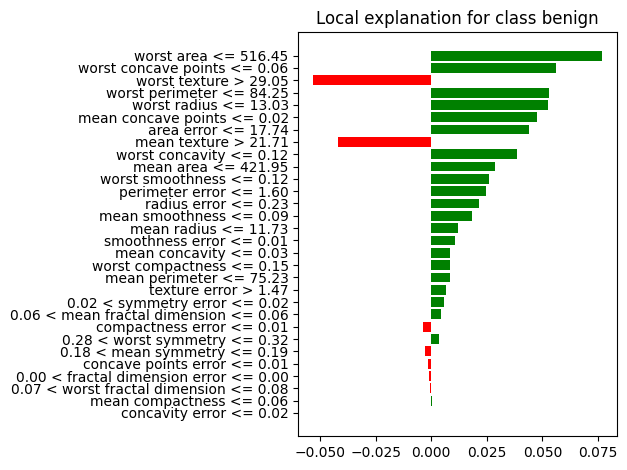

Correct:  malignant
Model Classification:  malignant
{'mean radius': 19.68, 'mean texture': 21.68, 'mean perimeter': 129.9, 'mean area': 1194.0, 'mean smoothness': 0.09797, 'mean compactness': 0.1339, 'mean concavity': 0.1863, 'mean concave points': 0.1103, 'mean symmetry': 0.2082, 'mean fractal dimension': 0.05715, 'radius error': 0.6226, 'texture error': 2.284, 'perimeter error': 5.173, 'area error': 67.66, 'smoothness error': 0.004756, 'compactness error': 0.03368, 'concavity error': 0.04345, 'concave points error': 0.01806, 'symmetry error': 0.03756, 'fractal dimension error': 0.003288, 'worst radius': 22.75, 'worst texture': 34.66, 'worst perimeter': 157.6, 'worst area': 1540.0, 'worst smoothness': 0.1218, 'worst compactness': 0.3458, 'worst concavity': 0.4734, 'worst concave points': 0.2255, 'worst symmetry': 0.4045, 'worst fractal dimension': 0.07918}


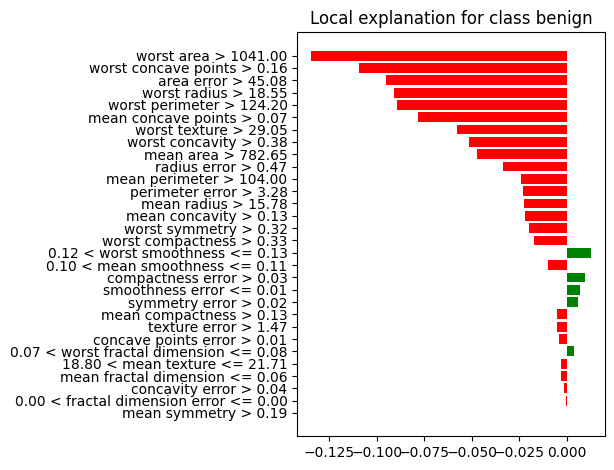

Correct:  benign
Model Classification:  benign
{'mean radius': 14.99, 'mean texture': 22.11, 'mean perimeter': 97.53, 'mean area': 693.7, 'mean smoothness': 0.08515, 'mean compactness': 0.1025, 'mean concavity': 0.06859, 'mean concave points': 0.03876, 'mean symmetry': 0.1944, 'mean fractal dimension': 0.05913, 'radius error': 0.3186, 'texture error': 1.336, 'perimeter error': 2.31, 'area error': 28.51, 'smoothness error': 0.004449, 'compactness error': 0.02808, 'concavity error': 0.03312, 'concave points error': 0.01196, 'symmetry error': 0.01906, 'fractal dimension error': 0.004015, 'worst radius': 16.76, 'worst texture': 31.55, 'worst perimeter': 110.2, 'worst area': 867.1, 'worst smoothness': 0.1077, 'worst compactness': 0.3345, 'worst concavity': 0.3114, 'worst concave points': 0.1308, 'worst symmetry': 0.3163, 'worst fractal dimension': 0.09251}


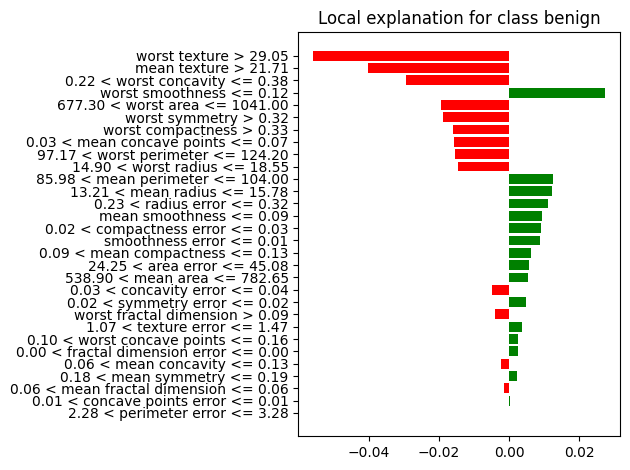

Correct:  benign
Model Classification:  benign
{'mean radius': 13.71, 'mean texture': 18.68, 'mean perimeter': 88.73, 'mean area': 571.0, 'mean smoothness': 0.09916, 'mean compactness': 0.107, 'mean concavity': 0.05385, 'mean concave points': 0.03783, 'mean symmetry': 0.1714, 'mean fractal dimension': 0.06843, 'radius error': 0.3191, 'texture error': 1.249, 'perimeter error': 2.284, 'area error': 26.45, 'smoothness error': 0.006739, 'compactness error': 0.02251, 'concavity error': 0.02086, 'concave points error': 0.01352, 'symmetry error': 0.0187, 'fractal dimension error': 0.003747, 'worst radius': 15.11, 'worst texture': 25.63, 'worst perimeter': 99.43, 'worst area': 701.9, 'worst smoothness': 0.1425, 'worst compactness': 0.2566, 'worst concavity': 0.1935, 'worst concave points': 0.1284, 'worst symmetry': 0.2849, 'worst fractal dimension': 0.09031}


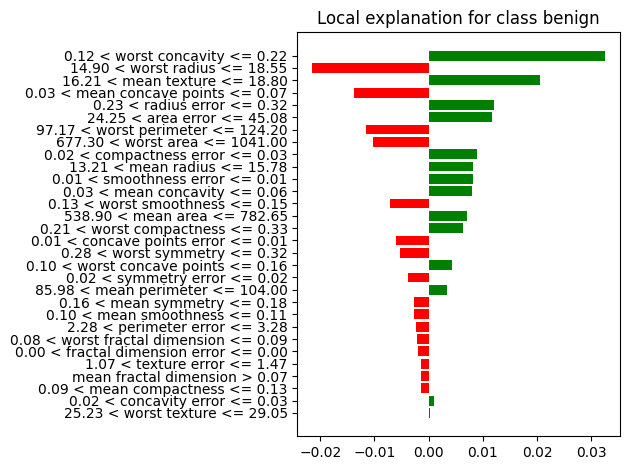

Correct:  malignant
Model Classification:  malignant
{'mean radius': 15.7, 'mean texture': 20.31, 'mean perimeter': 101.2, 'mean area': 766.6, 'mean smoothness': 0.09597, 'mean compactness': 0.08799, 'mean concavity': 0.06593, 'mean concave points': 0.05189, 'mean symmetry': 0.1618, 'mean fractal dimension': 0.05549, 'radius error': 0.3699, 'texture error': 1.15, 'perimeter error': 2.406, 'area error': 40.98, 'smoothness error': 0.004626, 'compactness error': 0.02263, 'concavity error': 0.01954, 'concave points error': 0.009767, 'symmetry error': 0.01547, 'fractal dimension error': 0.00243, 'worst radius': 20.11, 'worst texture': 32.82, 'worst perimeter': 129.3, 'worst area': 1269.0, 'worst smoothness': 0.1414, 'worst compactness': 0.3547, 'worst concavity': 0.2902, 'worst concave points': 0.1541, 'worst symmetry': 0.3437, 'worst fractal dimension': 0.08631}


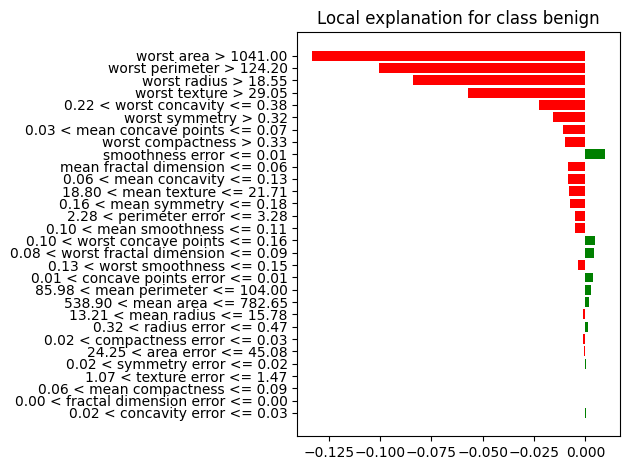

Correct:  benign
Model Classification:  benign
{'mean radius': 13.74, 'mean texture': 17.91, 'mean perimeter': 88.12, 'mean area': 585.0, 'mean smoothness': 0.07944, 'mean compactness': 0.06376, 'mean concavity': 0.02881, 'mean concave points': 0.01329, 'mean symmetry': 0.1473, 'mean fractal dimension': 0.0558, 'radius error': 0.25, 'texture error': 0.7574, 'perimeter error': 1.573, 'area error': 21.47, 'smoothness error': 0.002838, 'compactness error': 0.01592, 'concavity error': 0.0178, 'concave points error': 0.005828, 'symmetry error': 0.01329, 'fractal dimension error': 0.001976, 'worst radius': 15.34, 'worst texture': 22.46, 'worst perimeter': 97.19, 'worst area': 725.9, 'worst smoothness': 0.09711, 'worst compactness': 0.1824, 'worst concavity': 0.1564, 'worst concave points': 0.06019, 'worst symmetry': 0.235, 'worst fractal dimension': 0.07014}


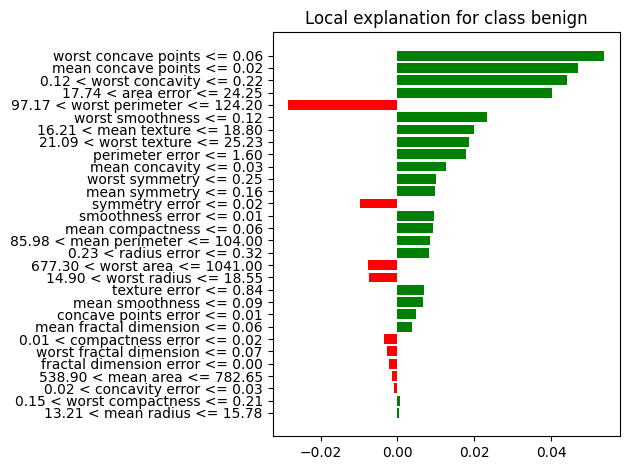

In [ ]:
explainer = lime_tabular.LimeTabularExplainer(
    training_data = X_train,
    feature_names = data['feature_names'],
    class_names = data['target_names'],
    mode = 'classification'
)

#Explain individual instances
for i in range(20):
  print('Correct: ' , 'benign' if y_test[i] else 'malignant')
  prediction = forest_clf.predict([X_test[i]])
  print('Model Classification: ', 'benign' if prediction else 'malignant')
  print(dict(zip(data['feature_names'],X_test[i])))

  instance = X_test[i]
  explanation = explainer.explain_instance(
      data_row = instance,
      predict_fn = forest_clf.predict_proba,
      num_features=30
  )

  fig = explanation.as_pyplot_figure()
  plt.tight_layout()
  plt.show()


**1. Y-Axis (Feature and Thresholds):**
The y-axis lists the features used in the model's prediction, along with specific threshold values or conditions for each feature. For example:

"worst area > 1041.00" means the value of the feature "worst area" for this particular instance is greater than 1041.00.
"texture error ≤ 0.84" means the value of the feature "texture error" is less than or equal to 0.84.
Each of these rows represents a feature and its contribution in the local explanation for why the model predicted the benign class for this specific case.

**2. Bar Colors:**
The colors of the bars indicate whether a feature pushes the prediction towards the benign or malignant class:

Red Bars: These features push the prediction towards malignant. In other words, these feature values align more with instances classified as malignant by the model.
Green Bars: These features push the prediction towards benign. These feature values are more typical of instances classified as benign by the model.

**3. Bar Length and Direction:**
The length of the bars indicates the magnitude of the contribution of each feature to the prediction. *Longer bars mean that the feature had a stronger influence on the model's decision.*
The direction of the bars also matters:
Bars pointing left (negative direction): These contribute to the prediction of benign.
Bars pointing right (positive direction): These contribute towards the prediction of malignant.

**Example Breakdown:**
"worst area > 1041.00": The large red bar indicates that this feature is a strong factor pushing the model towards predicting malignant. However, since the final prediction is benign, other factors (with green bars) outweighed it.
"texture error ≤ 0.84": This green bar indicates that this feature strongly pushes the prediction towards benign.